# Машинное обучение – весна 2024

# Домашнее задание 5 (бонус): Кластеризация


# Часть 1: K-Means (3 балла)


## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [1]:
import pandas as pd
import time 

In [13]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true", engine='openpyxl')

In [15]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [17]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [19]:
ratings = ratings.drop('user')

Заполните пропуски нулями.

In [21]:
ratings = ratings.fillna(0)

Нормализуйте данные при помощи `normalize`.

In [23]:
from sklearn.preprocessing import normalize

rats = normalize(ratings)
ratings = pd.DataFrame(rats, columns=ratings.columns, index = ratings.index)


Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [25]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(ratings)
clusters = kmeans.predict(ratings)
ratings1 = ratings.copy()
ratings1['cluster'] = clusters

Выведите на экран центры кластеров (центроиды)

In [27]:
centroids = kmeans.cluster_centers_

centroids

array([[ 1.67830066e-03, -4.33680869e-19,  1.21266299e-04, ...,
         1.08420217e-18, -2.16840434e-19, -8.67361738e-19],
       [ 1.88589225e-03,  1.06654937e-04,  8.09463797e-04, ...,
         2.68938484e-03,  0.00000000e+00,  1.19757379e-03],
       [ 3.55821439e-04,  1.44240237e-04,  1.73721732e-03, ...,
         1.59066890e-04,  5.16646974e-03,  4.29001462e-04],
       [-1.30104261e-18,  1.60551391e-03,  1.92730597e-03, ...,
         8.36063816e-03,  0.00000000e+00, -1.08420217e-18],
       [ 2.14071913e-03,  1.93800900e-03,  1.67549440e-03, ...,
         3.78204679e-04,  1.58093924e-03,  3.39174746e-03]])

Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).



Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [29]:
from scipy import spatial

def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [31]:
top_artists = {
    cluster: (lambda ratings1: ratings1.iloc[pClosest(ratings1.values, kmeans.cluster_centers_[cluster], K=10)].index.tolist())
    (ratings[ratings1['cluster'] == cluster])
    for cluster in range(5)
}
for i in range(5): #я не смог без цикла, простите.
    print(f'For cluster {i} top-artists are {top_artists[i]}')

For cluster 0 top-artists are ['nas', 'jay-z', 'kanye west', 'lupe the gorilla', 'a tribe called quest', "the roots featuring d'angelo", 'gangstarr', 'little brother', "lil' wayne", 'murs and 9th wonder']
For cluster 1 top-artists are ['fall out boy', 'the all-americian rejects', 'paramore', 'kelly clarkson', 'john mayer', 'the fray', 'maroon5', 'dashboard confesssional', 'somethings corporate', 'coldplay']
For cluster 2 top-artists are ['brand new', 'blink-182', 'alkaline trio', 'against me!', 'underoath', 'descendents', 'new found glory', 'less than jake', 'thrice', 'chiodos']
For cluster 3 top-artists are ['the beatles', 'the rolling stones', 'dylan. bob', 'who', 'led zeppelin.', 'miles davis.', 'simon and garfunkel', 'young, neil', 'pink fluid', 'velvet underground']
For cluster 4 top-artists are ['radiohead', 'the arcade fire', 'the shins', 'sufjan stevens', 'belle and sebastian', 'broken social scene', 'the pixies', 'animal collective', 'modest mouse', 'spoon']


**Вопрос:**
Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

**Ответ:** Я очень плохой музыковед, но, кажется, кластеры похожи на разбивку по жанрам: кластер 0 (ДжейЗи и Канье) выглядят как хип-хоп. Для интерпретации остального я обратился к подруге-эксперту. Профессионал сказал, что кластер 1 похож на поп, кластер 2 - на рок, кластер 3 - на ретро, кластер 4 - на инди. Мне осталось только положиться на мнение по-настоящему образованного человека.

# Часть 2: Сравнение алгоритмов кластеризации (3 балла)

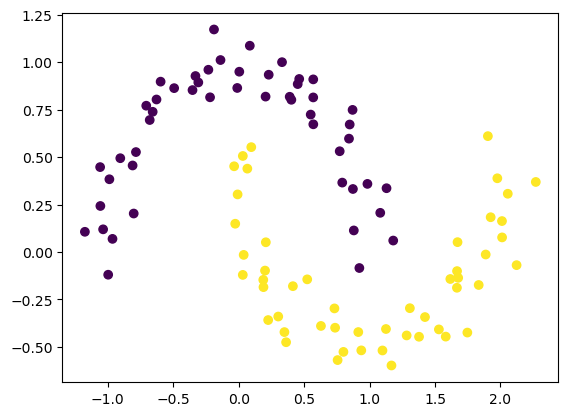

In [33]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans:



1.   Попробуйте подставить нужное количество кластеров
2.   Выберите количество кластеров с использованием индекса Силуэта





In [98]:
from sklearn.metrics import silhouette_score
import numpy as np
range_n_c = range(3, 20)

avgs = []
ts = []
best_score = -1
best_params = None

for n in range_n_c:
    start_time = time.time()
    kmeans = KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    avg = silhouette_score(X, cluster_labels)
    avgs.append(avg)
    end_time = time.time()
    if len(set(cluster_labels)) > 1: #иначе так себе качество кластеризации
        avg = silhouette_score(X, cluster_labels)
        if avg > best_score:
            best_score = avg
            best_params = n
    t = end_time - start_time
    ts.append(t)
    print(f"Для n_clusters = {n} индекс Силуэта = {avg:.3f}, время выполнения = {execution_time:.6f} секунд")

print(f"Оптимальное количество кластеров: {best_params} с индексом Силуэта {best_score: .3f}. Среднее время работы алгоритма равно {np.mean(ts):.3f}")




Для n_clusters = 3 индекс Силуэта = 0.403, время выполнения = 0.000739 секунд
Для n_clusters = 4 индекс Силуэта = 0.446, время выполнения = 0.000739 секунд
Для n_clusters = 5 индекс Силуэта = 0.412, время выполнения = 0.000739 секунд
Для n_clusters = 6 индекс Силуэта = 0.439, время выполнения = 0.000739 секунд
Для n_clusters = 7 индекс Силуэта = 0.447, время выполнения = 0.000739 секунд
Для n_clusters = 8 индекс Силуэта = 0.431, время выполнения = 0.000739 секунд
Для n_clusters = 9 индекс Силуэта = 0.449, время выполнения = 0.000739 секунд
Для n_clusters = 10 индекс Силуэта = 0.473, время выполнения = 0.000739 секунд
Для n_clusters = 11 индекс Силуэта = 0.464, время выполнения = 0.000739 секунд
Для n_clusters = 12 индекс Силуэта = 0.451, время выполнения = 0.000739 секунд
Для n_clusters = 13 индекс Силуэта = 0.447, время выполнения = 0.000739 секунд
Для n_clusters = 14 индекс Силуэта = 0.440, время выполнения = 0.000739 секунд
Для n_clusters = 15 индекс Силуэта = 0.427, время выполнени


Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

In [78]:
from sklearn.cluster import DBSCAN

eps_values = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
min_samples_values = [4, 5, 6, 7]

best_score = -1
best_params = None
ts = []

for eps in eps_values:
    for min_samples in min_samples_values:
        start_time = time.time()
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        if len(set(cluster_labels)) > 1: #иначе так себе качество кластеризации
            avg = silhouette_score(X, cluster_labels)
            if avg > best_score:
                best_score = avg
                best_params = (eps, min_samples)
        end_time = time.time()
        t = end_time - start_time
        ts.append(t)
        print(f"Для eps = {eps}, min_samples = {min_samples} индекс Силуэта = {avg:.3f}, время выполнения = {t:.6f} секунд")

print(f"\nЛучшие параметры: eps = {best_params[0]}, min_samples = {best_params[1]} с индексом Силуэта = {best_score:.3f}. Среднее время работы алгоритма равно {np.mean(ts):.3f}")

final_dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
final_cluster_labels = final_dbscan.fit_predict(X)

Для eps = 0.05, min_samples = 4 индекс Силуэта = 0.308, время выполнения = 0.003610 секунд
Для eps = 0.05, min_samples = 5 индекс Силуэта = 0.308, время выполнения = 0.001640 секунд
Для eps = 0.05, min_samples = 6 индекс Силуэта = 0.308, время выполнения = 0.001456 секунд
Для eps = 0.05, min_samples = 7 индекс Силуэта = 0.308, время выполнения = 0.001219 секунд
Для eps = 0.1, min_samples = 4 индекс Силуэта = -0.310, время выполнения = 0.001601 секунд
Для eps = 0.1, min_samples = 5 индекс Силуэта = -0.310, время выполнения = 0.000531 секунд
Для eps = 0.1, min_samples = 6 индекс Силуэта = -0.310, время выполнения = 0.000484 секунд
Для eps = 0.1, min_samples = 7 индекс Силуэта = -0.310, время выполнения = 0.000461 секунд
Для eps = 0.2, min_samples = 4 индекс Силуэта = 0.311, время выполнения = 0.001535 секунд
Для eps = 0.2, min_samples = 5 индекс Силуэта = 0.320, время выполнения = 0.001451 секунд
Для eps = 0.2, min_samples = 6 индекс Силуэта = 0.075, время выполнения = 0.001022 секунд
Дл

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single']

Подберите гиперпараметры:

1.   Дающие наилучший результат
2.   С использованием индекса Силуэта



In [76]:
from sklearn.cluster import AgglomerativeClustering

links = ['ward', 'complete', 'average', 'single']

best_score = -1
best_link = None
ts = []

for linkage in links:
    start_time = time.time()
    clustering = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    cluster_labels = clustering.fit_predict(X)
    avg = silhouette_score(X, cluster_labels)
    if avg > best_score:
        best_score = avg
        best_linkage = linkage
    end_time = time.time()
    t = end_time - start_time
    ts.append(t)
    print(f"Для linkage = {linkage}, средний индекс Силуэта = {avg:.4f}, время выполнения = {t:.4f} секунд")

print(f"\nЛучший метод linkage: {best_linkage} с индексом Силуэта = {best_score:.3f}. Среднее время работы алгоритма равно {np.mean(ts):.3f}")

Для linkage = ward, средний индекс Силуэта = 0.4412, время выполнения = 0.0228 секунд
Для linkage = complete, средний индекс Силуэта = 0.4677, время выполнения = 0.0036 секунд
Для linkage = average, средний индекс Силуэта = 0.4677, время выполнения = 0.0028 секунд
Для linkage = single, средний индекс Силуэта = 0.3075, время выполнения = 0.0012 секунд

Лучший метод linkage: complete с индексом Силуэта = 0.468. Среднее время работы алгоритма равно 0.008


Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте affinity='nearest_neighbors'. Рассмотрите гиперпараметр n_neighbors из диапазона [1,2,...,19].

Подберите гиперпараметры:

1.   Дающие наилучший результат
2.   С использованием индекса Силуэта

In [92]:
from sklearn.cluster import SpectralClustering
n_neighbors_range = range(1, 20)

best_score = -1
best_n = None
execution_times = []
ts = []

for n in n_neighbors_range:
    start_time = time.time()
    clustering = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', n_neighbors=n, random_state=42)
    cluster_labels = clustering.fit_predict(X)
    avg = silhouette_score(X, cluster_labels)
    if avg > best_score:
        best_score = avg
        best_n = n
    end_time = time.time()
    t = end_time - start_time
    ts.append(t)
    print(f"Для n_neighbors = {n}, индекс Силуэта = {avg:.4f}, время выполнения = {t:.4f} секунд")

print(f"\nЛучший n_neighbors: {best_n} с индексом Силуэта = {best_score:.3f}. Среднее время работы алгоритма равно {np.mean(ts):.3f}")


/Users/dmlast/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/dmlast/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/dmlast/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/dmlast/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Для n_neighbors = 1, индекс Силуэта = 0.0055, время выполнения = 0.0339 секунд
Для n_neighbors = 2, индекс Силуэта = 0.0525, время выполнения = 0.0541 секунд
Для n_neighbors = 3, индекс Силуэта = 0.0736, время выполнения = 0.0347 секунд
Для n_neighbors = 4, индекс Силуэта = 0.4117, время выполнения = 0.0441 секунд
Для n_neighbors = 5, индекс Силуэта = 0.3203, время выполнения = 0.0910 секунд
Для n_neighbors = 6, индекс Силуэта = 0.4421, время выполнения = 0.0577 секунд
Для n_neighbors = 7, индекс Силуэта = 0.4611, время выполнения = 0.0697 секунд
Для n_neighbors = 8, индекс Силуэта = 0.4611, время выполнения = 0.0582 секунд
Для n_neighbors = 9, индекс Силуэта = 0.4469, время выполнения = 0.0439 секунд
Для n_neighbors = 10, индекс Силуэта = 0.4642, время выполнения = 0.0260 секунд
Для n_neighbors = 11, индекс Силуэта = 0.4606, время выполнения = 0.0359 секунд
Для n_neighbors = 12, индекс Силуэта = 0.4514, время выполнения = 0.0401 секунд
Для n_neighbors = 13, индекс Силуэта = 0.4606, вр

**Вопрос:** Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?

**Ответ:** 
1. Лучший скор показали ближайшие соседи (индекс Силуэта 0.473) с параметром n = 10.
2. Среднее время работы ниже всего у DBSCAN (0.002 сек).
3. Оптимальным по соотношению времени-качества выглядит спектральная кластеризация с нашими гиперпараметрами. Там лучший скор равен 0.467, а среднее время работы алгоритма составляет 0.045


# Часть 3: DBSCAN своими руками (4 балла)


DBSCAN: Density-based spatial clustering of applications with noise

Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [102]:
from scipy.spatial import distance

In [104]:
# Рекомендации -- это только рекомендации
import numpy as np
class dbscan:
    
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels = None
        self.visited = None

    def fit_predict(self, X):
        n_points = X.shape[0]
        self.labels = np.full(n_points, -1)  # -1 для шума
        self.visited = np.full(n_points, False)
        cluster_id = 0
        for i in range(n_points):
            if not self.visited[i]:
                self.visited[i] = True
                neighbors = self.range_query(X, i)
                if len(neighbors) < self.min_samples:
                    self.labels[i] = -1  # Помечаем как шум
                else:
                    self.grow_cluster(X, i, neighbors, cluster_id)
                    cluster_id += 1
        return self.labels

    def grow_cluster(self, X, root, neighbors, cluster_id):
        self.labels[root] = cluster_id
        i = 0
        while i < len(neighbors):
            point = neighbors[i]     
            if not self.visited[point]:
                self.visited[point] = True
                new_neighbors = self.range_query(X, point)  
                if len(new_neighbors) >= self.min_samples:
                    neighbors = neighbors + new_neighbors
            
            if self.labels[point] == -1:
                self.labels[point] = cluster_id         
            i += 1

    def range_query(self, X, point_idx):
        neighbors = []
        for i in range(X.shape[0]):
            if self.dist(X[point_idx], X[i]) <= self.eps:
                neighbors.append(i)
        return neighbors

    @staticmethod
    def dist(a, b):
        return distance.euclidean(a, b)

Проверим себя на простом примере:

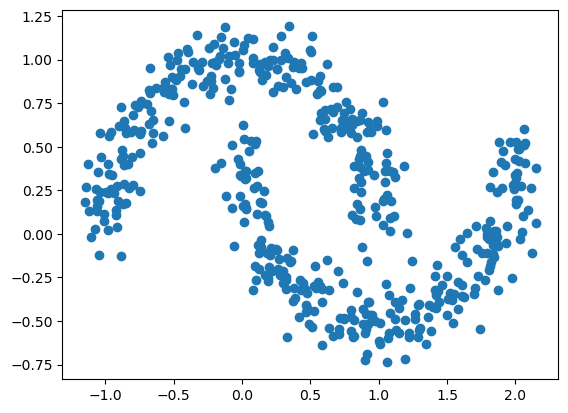

In [106]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

Кластеризуйте датасет с помощью своей версии DBSCAN:

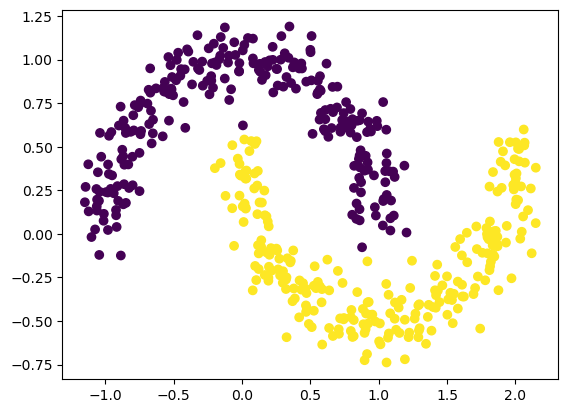

In [108]:
clusters = dbscan(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

Референс:

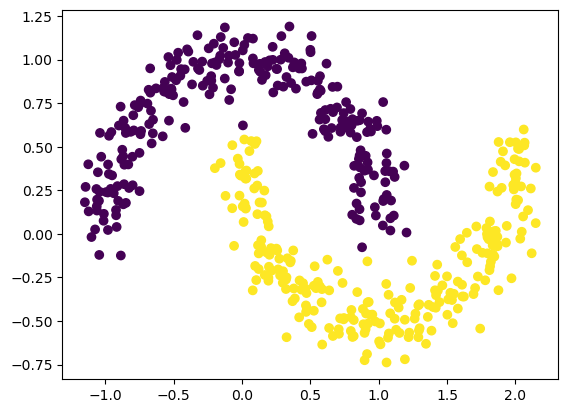

In [110]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

Придумайте один интересный пример кластеризации:

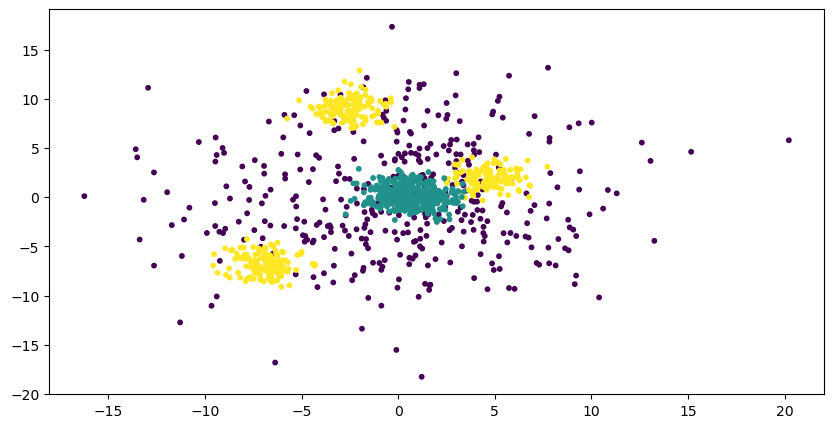

In [190]:
# мой мозг не придумал ничего лучше, чем попытаться соединить стандартные функции с небольшим шумом. 
#но при переборе гиперпараметров иногда выходит красиво

from sklearn.datasets import make_s_curve, make_blobs, make_moons

def generate_noisy_data(n_samples=1200, noise=0.5):
    X_s_curve, _ = make_s_curve(n_samples // 3, noise = 5 + noise)
    X_s_curve = X_s_curve[:, [0, 2]]  # Используем только две оси для визуализации
    X_blobs, _ = make_blobs(n_samples=n_samples // 3, centers=3, cluster_std=1, random_state=42)
    X_moons, _ = make_moons(n_samples=n_samples // 3, noise = 0.6 + noise)
    X = np.vstack((X_s_curve, X_blobs, X_moons))
    y = np.hstack((np.zeros(len(X_s_curve)), np.ones(len(X_blobs)), np.full(len(X_moons), 0.5)))

    return X, y

X, y = generate_noisy_data(n_samples=1200, noise=0.2)

plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.show()



Картинки в качестве референса:

(Нужно несколько интересных соседствующих форм)



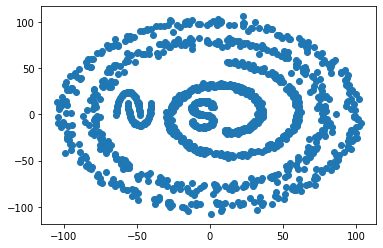

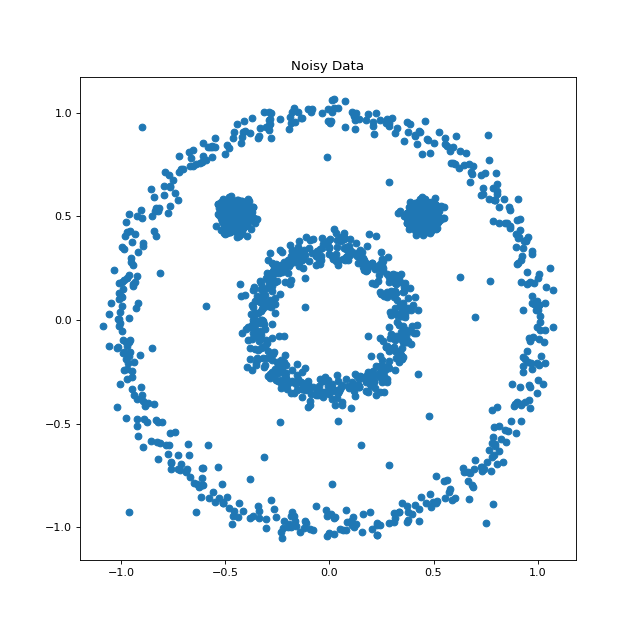
